## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
import vis
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [75]:
print("Train Input Samples: ", x_train.shape)
print("Training Labels Samples: ", y_train.shape);
print("Test Input Samples: ", x_test.shape)
print("Test Labels Samples: ", y_test.shape)

Train Input Samples:  (60000, 28, 28)
Training Labels Samples:  (60000,)
Test Input Samples:  (10000, 28, 28)
Test Labels Samples:  (10000,)


### Find dimensions of an image in the dataset

In [76]:
print("Image Dimensions: " + str(x_train.shape[1]) + "*" + str(x_train.shape[2]))

Image Dimensions: 28*28


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_conv =  x_train.astype("float32") / 255
x_test_conv = x_test.astype("float32") / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train_conv = x_train_conv.reshape(x_train_conv.shape[0], 28, 28, 1)
x_test_conv = x_test_conv.reshape(x_test_conv.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Build a model 

** with 2 Conv layers having 32 3x3 filters in both convolutions with relu activations and flatten before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with relu and softmax activations respectively. Now, using categorical_crossentropy loss with adam optimizer train the model with early stopping patience=5 and no.of epochs=10. **

In [0]:
model_simple_conv = Sequential()

model_simple_conv.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(128, activation='relu'))
model_simple_conv.add(Dense(10, activation='softmax'))

model_simple_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [0]:
callback = [EarlyStopping(monitor='val_loss', patience = 5)]

In [83]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [84]:
output_simple_conv = model_simple_conv.fit(x_train_conv, y_train, callbacks = callback, batch_size = 500,
                                           epochs = 10, verbose = 1, validation_data = (x_test_conv, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.5188 - acc: 0.8181 - val_loss: 0.3827 - val_acc: 0.8639
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3122 - acc: 0.8890 - val_loss: 0.3134 - val_acc: 0.8869
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2605 - acc: 0.9053 - val_loss: 0.2870 - val_acc: 0.8959
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2295 - acc: 0.9163 - val_loss: 0.2815 - val_acc: 0.9008
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2028 - acc: 0.9263 - val_loss: 0.2757 - val_acc: 0.9015
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1742 - acc: 0.9362 - val_loss: 0.2681 - val_acc: 0.9080
Epoch 7/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1518 - acc: 0.9446 - val_loss: 0.2689 - val_acc

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model_pooling_conv = Sequential()

model_pooling_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Dropout(0.25))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(Dense(10, activation='softmax'))

model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [86]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               204928    
__________

In [87]:
output_pooling_conv = model_pooling_conv.fit(x_train_conv, y_train, callbacks = callback, batch_size = 500, 
                                             epochs = 10, verbose=1, validation_data=(x_test_conv, y_test))
                

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.7714 - acc: 0.7234 - val_loss: 0.4977 - val_acc: 0.8198
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.4565 - acc: 0.8352 - val_loss: 0.4204 - val_acc: 0.8502
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.4027 - acc: 0.8553 - val_loss: 0.3808 - val_acc: 0.8648
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3675 - acc: 0.8677 - val_loss: 0.3656 - val_acc: 0.8676
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3438 - acc: 0.8768 - val_loss: 0.3376 - val_acc: 0.8787
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3285 - acc: 0.8819 - val_loss: 0.3224 - val_acc: 0.8843
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3134 - acc: 0.8855 - val_loss: 0.3211 - val_acc

### Now, to the above model, lets add Data Augmentation

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    rotation_range=25,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=False,  
    vertical_flip=False)  

In [0]:
# Set up the generator
datagen.fit(x_train_conv)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

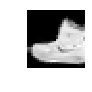

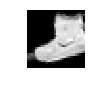

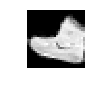

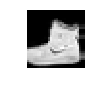

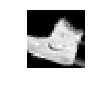

In [91]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
    plt.show()

### Run the above model using fit_generator()

In [0]:
model_data_augment = Sequential()

model_data_augment.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_data_augment.add(MaxPooling2D(pool_size=(2, 2)))
model_data_augment.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_data_augment.add(MaxPooling2D(pool_size=(2, 2)))
model_data_augment.add(Dropout(0.25))
model_data_augment.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_data_augment.add(Dropout(0.25))
model_data_augment.add(Flatten())
model_data_augment.add(Dense(128, activation='relu'))
model_data_augment.add(Dropout(0.25))
model_data_augment.add(Dense(10, activation='softmax'))

In [41]:
model_data_augment.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 3, 128)         0         
__________

In [0]:
model_data_augment.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [49]:
history = model_data_augment.fit_generator(datagen.flow(x_train_conv, y_train, batch_size = 32), validation_data = (x_test_conv, y_test), 
                            steps_per_epoch=len(x_train_conv) / 32 , use_multiprocessing = True, epochs=5, callbacks = callback)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5844 - acc: 0.7781 - val_loss: 0.4491 - val_acc: 0.8354
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5081 - acc: 0.8073 - val_loss: 0.4191 - val_acc: 0.8459
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4711 - acc: 0.8213 - val_loss: 0.3782 - val_acc: 0.8572
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4444 - acc: 0.8341 - val_loss: 0.3521 - val_acc: 0.8718
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4243 - acc: 0.8408 - val_loss: 0.3476 - val_acc: 0.8692


###  Report the final train and validation accuracy

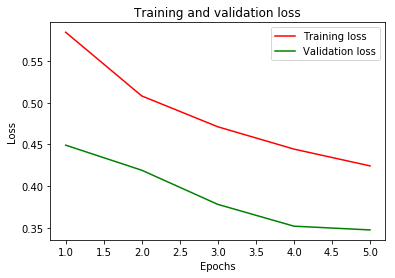

In [64]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

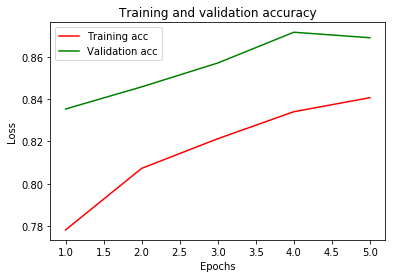

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
simple_conv_score = model_simple_conv.evaluate(x_test_conv, y_test, batch_size = 500)
print('Simple Convolution Test loss:', simple_conv_score[0])
print('Simple Convolution Test accuracy:', simple_conv_score[1])

pool_conv_score = model_pooling_conv.evaluate(x_test_conv, y_test, batch_size = 500)
print('Simple Convolution Test loss:', pool_conv_score[0])
print('Simple Convolution Test accuracy:', pool_conv_score[1])

data_augment_conv_score = model_data_augment.evaluate(x_test_conv, y_test)
print('Simple Convolution Test loss:', data_augment_conv_score[0])
print('Simple Convolution Test accuracy:', data_augment_conv_score[1])


10000/10000 [==============================] - 0s 33us/step
Simple Convolution Test loss: 0.28632787987589836
Simple Convolution Test accuracy: 0.9124000012874603
10000/10000 [==============================] - 0s 19us/step
Simple Convolution Test loss: 0.28248363435268403
Simple Convolution Test accuracy: 0.8970000058412552
10000/10000 [==============================] - 1s 79us/step
Simple Convolution Test loss: 0.34757698323726655
Simple Convolution Test accuracy: 0.8692


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [94]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 41s 0us/step


### **Load CIFAR10 dataset**

In [107]:
print("Train Input Samples: ", x_train.shape[0])
print("Training Labels Samples: ", y_train.shape[0]);
print("Test Input Samples: ", x_test.shape[0])
print("Test Labels Samples: ", y_test.shape[0])

Train Input Samples:  50000
Training Labels Samples:  50000
Test Input Samples:  10000
Test Labels Samples:  10000


In [108]:
print("Image Dimensions: " + str(x_train.shape[1]) + "*" + str(x_train.shape[2]))

Image Dimensions: 32*32


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
x_train_conv =  x_train.astype("float32") / 255
x_test_conv = x_test.astype("float32") / 255

In [0]:
x_train_conv = x_train_conv.reshape(x_train_conv.shape[0], 32, 32, 3)
x_test_conv = x_test_conv.reshape(x_test_conv.shape[0], 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True,  
    vertical_flip=False,)  

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train_conv)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

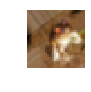

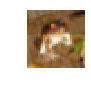

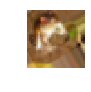

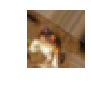

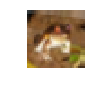

In [116]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
    plt.show()